# **Part 3. VGG on CIFAR100 and CIFAR10**
### VGG is a simple, but powerful CNN created in 2015. Read the VGG paper here: https://arxiv.org/pdf/1409.1556.pdf

### Here, we're going to try to reproduce the model's findings on the cifar10 and cifar100 dataset. Note that the paper takes 224 x 224 images, but cifar10 and 100 are only 32 x 32 images.

### Implement all of the layers for the VGG ConvNet Configuration 
### A. Please use the shell code below as guide. Then, train this network on the Cifar10 and Cifar100 datasets.For Cifar10 and 100, VGG is probably overkill. Try changing the number of layers and number of filters without sacrificing too much performance accuracy. How many filters can you get rid of before you see the accuracy drop by more than 2%? 
CIFAR 10: the performance of VGG is about 27% validation error. When decreasing layers to 5 upwards, the performace will go down dramatically. When decrease the layers to 10 layers downwards, the performance drops over 2%. 
### B. Where in the architecture is it better to remove filters - towards the input layers, or more towards the output layers?
It is better to remove filter towards input layers. Decreasing the input side layers affects the accuracy more.
### C.For what you experiment with--report the parameter, validation loss curves for changing the number of i) layers, ii) filter size, iii) both.
Summary in the png picture in the file.

## CIFAR 10

170500096/170498071 [==============================] - 32s 0us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            

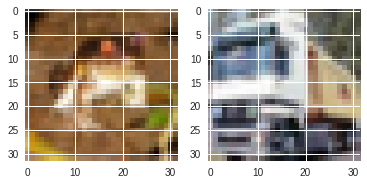

In [1]:
# This is the same model in the other notebook, looks very simplified.
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# layer = 11, filter =3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=50, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stop])

[47.26     35.049995 31.32     30.510002 28.899994 27.380005 27.660004
 28.669998 27.949997 27.840004 27.490005]
[ 1  2  3  4  5  6  7  8  9 10 11]


Text(0, 0.5, 'Validation error(%)')

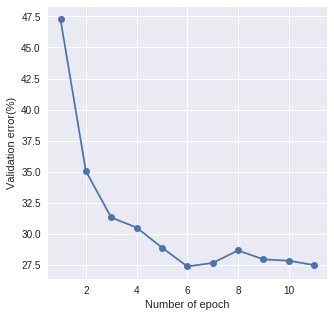

In [10]:
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 12)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 31s 0us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            

Text(0, 0.5, 'Validation error(%)')

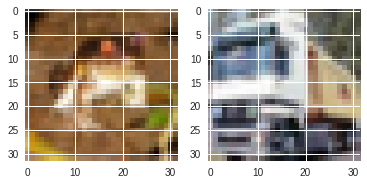

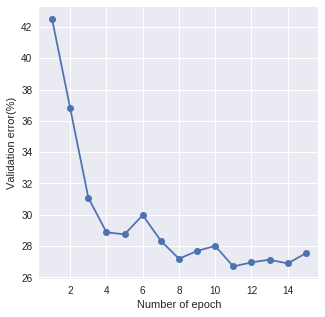

In [1]:
# # Decrease layers towards input: 9 layers, filter size=3
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         590080    
_______________________________

Text(0, 0.5, 'Validation error(%)')

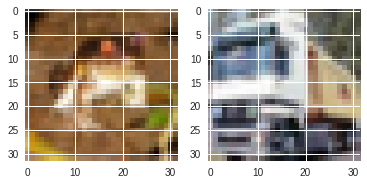

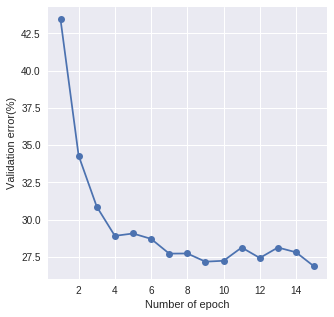

In [1]:
# Decrease layers towards input: 7 layers, filter size=3
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 164s 1us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)               

Text(0, 0.5, 'Validation error(%)')

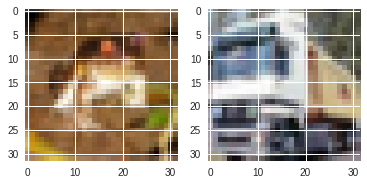

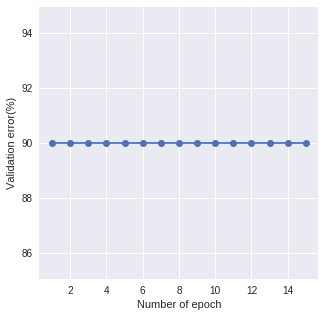

In [1]:
# Decrease layers towards input: 5 layers, filter size=3
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),    
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 70s 0us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            

Text(0, 0.5, 'Validation error(%)')

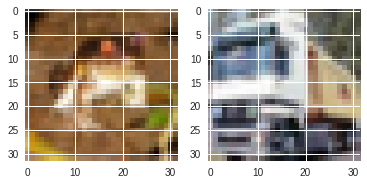

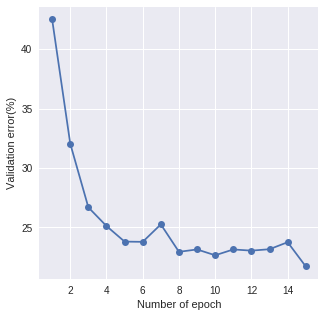

In [1]:
# Decrease layers towards output: 10 layers, filter size=3
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# Example CNN used in class
model = tf.keras.Sequential([
    #tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    #tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 89s 1us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
conv2d_3 (Conv2D)            

Text(0, 0.5, 'Validation error(%)')

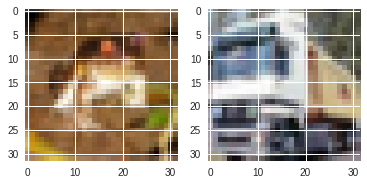

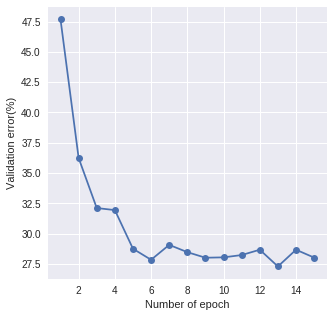

In [1]:
# Decrease layers downwards: 11 layers, filter size=5
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=5
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 65s 0us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         1605888   
_________________________________________________________________
conv2d_3 (Conv2D)            

Text(0, 0.5, 'Validation error(%)')

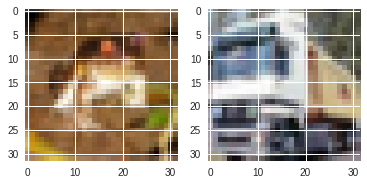

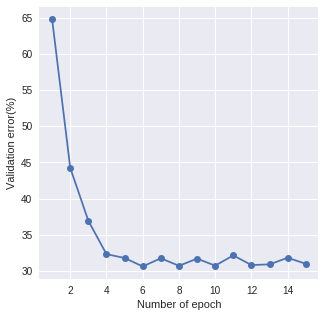

In [1]:
# Decrease layers towards output: 11 layers, filter size=7
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=7
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 244s 1us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
conv2d_3 (Conv2D)           

Text(0, 0.5, 'Validation error(%)')

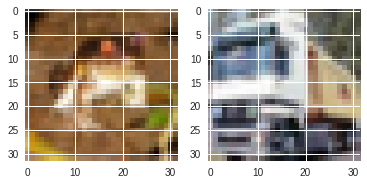

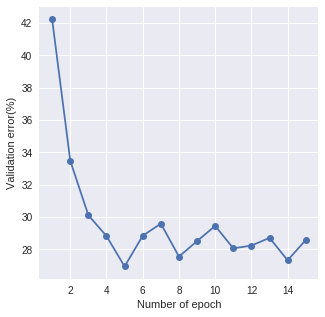

In [1]:
# Decrease layers towards output: 9 layers, filter size=5
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=5
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
   # tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

170500096/170498071 [==============================] - 440s 3us/step
Training data shape (50000, 32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         1605888   
_________________________________________________________________
conv2d_3 (Conv2D)           

Text(0, 0.5, 'Validation error(%)')

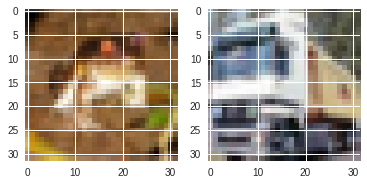

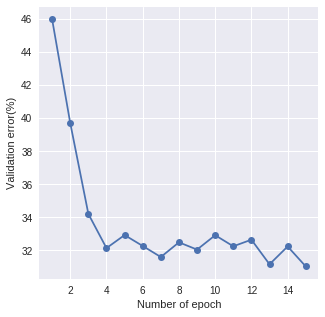

In [1]:
# Decrease layers towards output: 7 layers, filter size=5
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=7
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),
    
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    #tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=15, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

# draw the validation accuracy
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
epochs=15
plt.figure(figsize=(5,5))
epochnum=np.arange(1, epochs+1)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')

## CIFAR 100

169009152/169001437 [==============================] - 212s 1us/step
Training data shape (50000, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         590080    
__________________________________

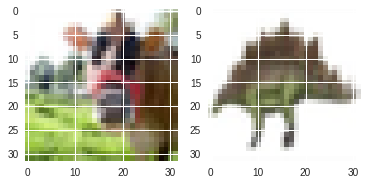

In [2]:
# This is the same model in the other notebook, looks very simplified.
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar100.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_val = tf.keras.utils.to_categorical(y_val, 100)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));
consize=3
# layer = 11, filter =3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (consize,consize), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),    
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (consize,consize), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5,verbose=0, mode='auto')
hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=5, #how many loops you make
          verbose=1,
          validation_data=(X_val, y_val))

[86.52     77.979996 72.32     68.       63.91    ]
[1 2 3 4 5]


Text(0, 0.5, 'Validation error(%)')

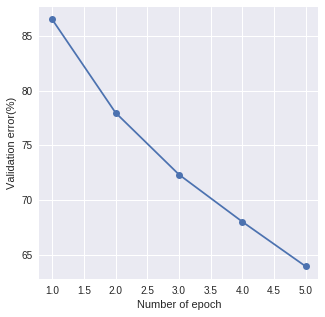

In [3]:
import numpy as np
acc_total= np.array(hist.history['val_acc'])
acc=100-100*acc_total
print(acc)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 6)
plt.plot(epochnum,acc,'o-')
print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error(%)')